`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


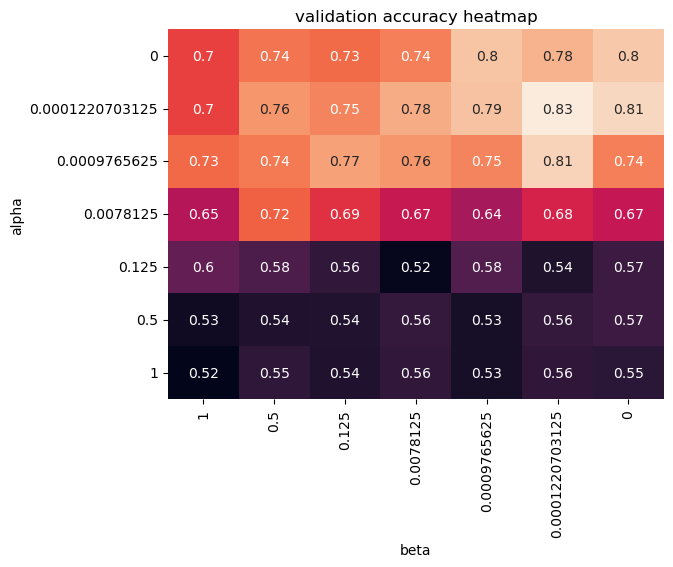

"max([(results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -\n                                                                        results.config.experiment_params['patience']\n                                                                        - 1] - results.model_data.history['val_clam_1_categorical_accuracy'][len(results.model_data.history['loss']) -\n                                                                        results.config.experiment_params['patience']\n                                                                        - 1], fname) for results, fname in zip(most_recent, fnames) if results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -\n                                                                        results.config.experiment_params['patience']\n                                                                        - 1] > .87 if 'cats' in str(results.config

In [2]:
import argparse
import pickle

import numpy as np
from support.util import load_most_recent_results_with_fnames as load_most_recent_results
from support.evaluations.image_classification import show_mask
from itertools import product
from support.util import dict_to_string, prep_gpu

import matplotlib.pyplot as plt
import seaborn as sn

# prep_gpu(12, 1, False)

shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../cats_dogs_grid'
metric = 'val_clam_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid = np.zeros(tuple(shape))
counts = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
#print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])
        
"""
{hyperparameter: set(values)}
equivalent to 
{hyperparameter: [distinct values]}
"""

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}

"""
{hyperparameter: [sorted distinct values]}

this is an array of zeros of shape (# of values for hyperparameter 1, # of values for hyperparameter 2)
grid = np.zeros(tuple([len(values[hpar]) for hpar in hyperparams]))

then you say for each combination that we have (this can be from the job iterator or the scores list)
- add the accuracy / score to the corresponding position in the list 
- coordinate is [values[hpar].index(combination[hpar]) for hpar in hyperparameters]
"""
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])
    try:
        grid[tuple(result_coord)] += results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    except:
        print(fname)
    counts[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts = np.maximum(np.ones_like(counts), counts)
grid /= counts
    
# print(dict_to_string(values))

# print(np.flip(grid, 1))
# print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
# plt.title(metric + ' heatmap')
plt.title('validation accuracy heatmap')
plt.show()

# sum(results.model_data.run_time for results in most_recent) / (3600*24)
"""max([(abs(results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] - (1 / 3)) - abs((1 / 3) - results.model_data.history['val_clam_1_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]), fname) for results, fname in zip(most_recent, fnames)], key=lambda k: k[0])"""

"""max([(results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] - results.model_data.history['val_clam_1_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1], fname) for results, fname in zip(most_recent, fnames) if results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] > .87 if 'cats' in str(results.config.dataset_params['dset_fn'])], key=lambda k: k[0])"""



In [1]:
from support.util import dict_to_string, prep_gpu
prep_gpu(12, 2, False)

2023-04-12 09:01:23.192972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
We have 2 GPUs



`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


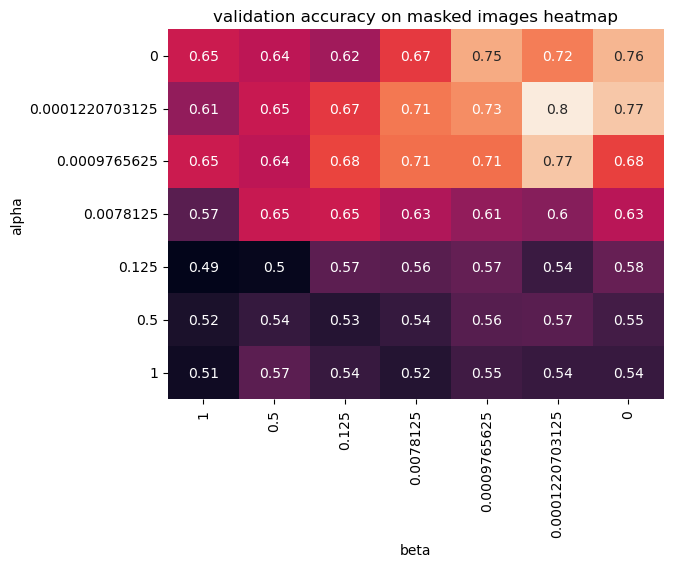

In [3]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../cats_dogs_grid'
metric2 = 'val_clam_1_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid2 = np.zeros(tuple(shape))
counts2 = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
#print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    grid2[tuple(result_coord)] += results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    counts2[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts2 = np.maximum(np.ones_like(counts2), counts2)
grid2 /= counts2
    
#print(dict_to_string(values))

#print(np.flip(grid2, 1))
#print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('validation accuracy on masked images heatmap')
plt.show()

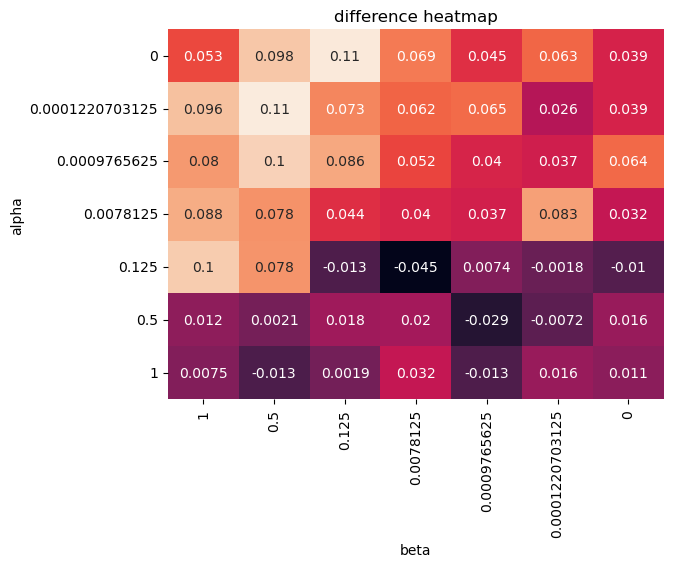

[['059232' '220812' '244442' '224336' '780155' '971787' '652633']
 ['885478' '527572' '931625' '620243' '604737' '889676' '228068']
 ['041862' '936272' '255898' '743633' '522223' '420125' '499079']
 ['450468' '793038' '993746' '240044' '379161' '589942' '780233']
 ['612296' '901733' '956596' '020792' '071117' '348246' '440021']
 ['279074' '216964' '527415' '763536' '418773' '007146' '945147']
 ['949268' '493336' '701906' '389133' '009503' '304938' '539612']]


In [3]:
sn.heatmap(np.flip(grid - grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])

plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()
print(np.flip(fnames_grid, 1))

In [7]:
diff = 0
f = ''
for results, fname in zip(most_recent, fnames):
    diff_new = max([results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] - results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1], diff])
    if diff_new > diff:
        diff = diff_new
        f = fname
        print(results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                            results.config.experiment_params['patience']
                                                                            - 1], results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                            results.config.experiment_params['patience']
                                                                            - 1], fname, results.model_data.network_params)
        
print(diff, f)

diff = 0
f = ''
for results, fname in zip(most_recent, fnames):
    diff_new = max([results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1], diff])
    if diff_new > diff:
        diff = diff_new
        f = fname
        print(results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                            results.config.experiment_params['patience']
                                                                            - 1], results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                            results.config.experiment_params['patience']
                                                                            - 1], fname, results.model_data.network_params)
        
print(diff, f)

0.6871508359909058 0.6364417672157288 565615 {'network_fn': <function build_focal_LAXNet_dropout at 0x2afdf9e5b2e0>, 'network_args': {'hyperband': False, 'conv_size': '[3]', 'learning_rate': 0.0005, 'l2': None, 'alpha': 0, 'dropout': 0.05, 'conv_filters': 16, 'image_size': (128, 128, 3), 'l1': None, 'gamma': 0, 'beta': 1, 'noise_level': 0, 'depth': 5, 'dense_layers': '[16]', 'n_classes': 2}, 'hyperband': False}
0.7021916508674622 0.6110872626304626 580715 {'network_fn': <function build_focal_LAXNet_dropout at 0x2afdf9e5b2e0>, 'network_args': {'hyperband': False, 'gamma': 0, 'conv_size': '[3]', 'image_size': (128, 128, 3), 'l2': None, 'depth': 5, 'noise_level': 0, 'alpha': 0.0078125, 'conv_filters': 16, 'l1': None, 'dropout': 0.05, 'beta': 1, 'learning_rate': 0.0005, 'dense_layers': '[16]', 'n_classes': 2}, 'hyperband': False}
0.7455951571464539 0.5870218873023987 526588 {'network_fn': <function build_focal_LAXNet_dropout at 0x2afdf9e5b2e0>, 'network_args': {'hyperband': False, 'l1': No

In [1]:
import pickle

metric = 'val_clam_categorical_accuracy'
metric2 = 'val_clam_1_categorical_accuracy'

with open(f'../cats_dogs_grid/971787', 'rb') as fp:
    results = pickle.load(fp)
    print(results.model_data.history[metric][len(results.model_data.history['loss']) - results.config.experiment_params['patience'] - 1], 
          results.model_data.history[metric2][len(results.model_data.history['loss']) - results.config.experiment_params['patience'] - 1],
         results.model_data.network_params)

2023-04-10 16:36:03.236083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.7872797846794128 0.5586591958999634 {'network_fn': <function build_focal_LAXNet at 0x2afe5b9e6680>, 'network_args': {'hyperband': False, 'conv_size': '[3]', 'learning_rate': 0.0005, 'n_classes': 2, 'l1': None, 'gamma': 0, 'noise_level': 0.005, 'alpha': 0, 'conv_filters': 24, 'dense_layers': '[16]', 'l2': None, 'depth': 5, 'image_size': (128, 128, 3), 'beta': 0.0001220703125}, 'hyperband': False}


In [2]:
#prep_gpu(12, 1, False)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'

dset_dict = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
class_names = dset_dict['class_names']

model_data = results.model_data

test_dset = dset_dict['test']

test_dset = test_dset.batch(1)

model = model_data.get_model()


------------------------------------------------------------
Experimental Results Summary (Index: 47)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2afe5c8f4af0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 97
	prefetch: 8
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_focal_LAXNet at 0x2afe5b9e6680>
	network_args: {
		hyperband: False
		conv_size: [3]
		learning_rate: 0.0005
		n_classes: 2
		l1: None
		gamma: 0
		noise_level: 0.005
		alpha: 0
		conv_filters: 24
		dense_layers: [16]
		l2: None
		depth: 5
		image_size: (128, 128, 3)
		beta: 0.0001220703125
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	patience: 32
	min_delta: 0.0
	epochs: 512
	nogo: False
	}

Experiment Runtime: 18737.037889957428s

Epochs Run / Average Time: 83 / 

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)


In [3]:
import tensorflow_datasets as tfds

numpy_test_dataset = tfds.as_numpy(test_dset)

In [4]:
first_k = []
k = 10
for x, y in numpy_test_dataset:
    first_k.append((x, y))
    k -= 1
    if not k:
        break

2023-04-10 16:38:24.991823: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-04-10 16:38:25.193512: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


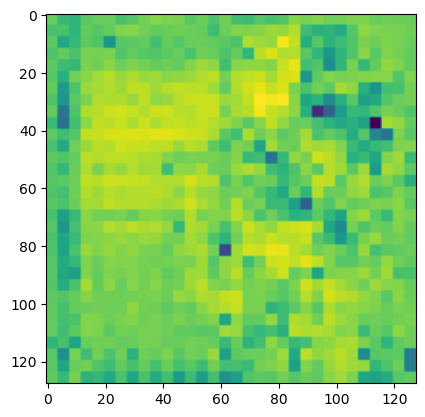

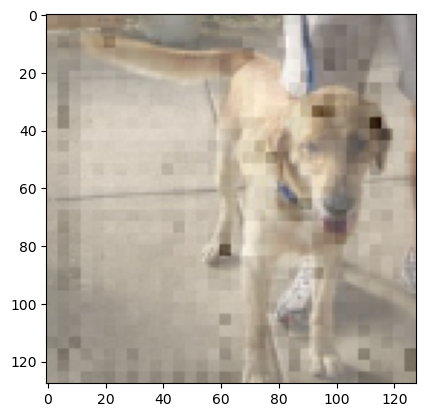

1/1 [==============================] - 6s 6s/step
{'crossentropy': <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.00115867, 0.99884135]], dtype=float32)>, 'cosine': <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.3380206e-06, 9.9999863e-01]], dtype=float32)>, 'all_masked': <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[6.3036144e-04, 9.9936968e-01]], dtype=float32)>, 'idk': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6421793]], dtype=float32)>} tf.Tensor([1], shape=(1,), dtype=int64)


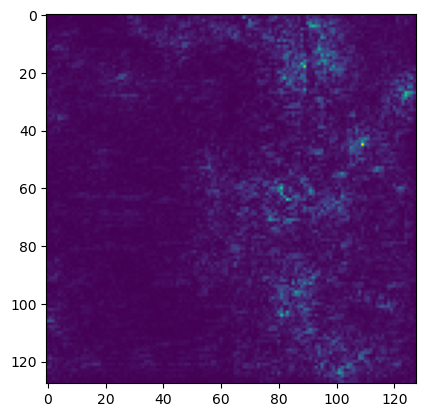

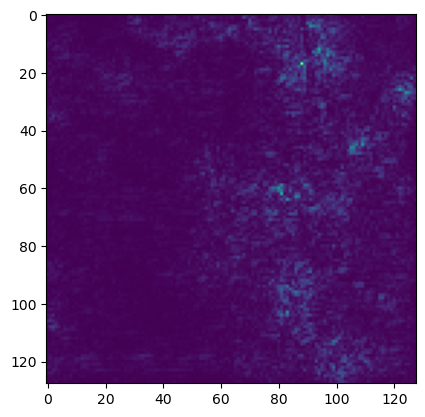

(128, 128) (128, 128, 3)


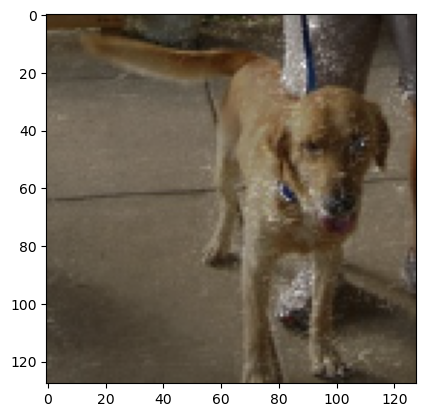

(<tf.Tensor: shape=(128, 128), dtype=float64, numpy=
 array([[0.00296715, 0.00498603, 0.00082376, ..., 0.03799007, 0.01713716,
         0.00512607],
        [0.00064396, 0.00731534, 0.00846514, ..., 0.01453306, 0.05169702,
         0.00999621],
        [0.00317277, 0.01012303, 0.00869221, ..., 0.03313092, 0.02613329,
         0.00862273],
        ...,
        [0.00374129, 0.01434653, 0.0205077 , ..., 0.        , 0.01785516,
         0.01413979],
        [0.03038749, 0.00591547, 0.05835525, ..., 0.00739927, 0.0286785 ,
         0.03137739],
        [0.00763961, 0.01734923, 0.00678015, ..., 0.02081345, 0.05694782,
         0.01440995]])>,
 <tf.Tensor: shape=(128, 128), dtype=float64, numpy=
 array([[0.0008955 , 0.0019668 , 0.        , ..., 0.02140977, 0.00764209,
         0.00244495],
        [0.00054546, 0.01152735, 0.01198919, ..., 0.01602173, 0.02361068,
         0.00637634],
        [0.00435833, 0.01419441, 0.01290266, ..., 0.02175849, 0.02051976,
         0.0090042 ],
        ...,
 

In [5]:
from support.evaluations.image_classification import explain_image_classifier_with_occlusion, explain_image_classifier_with_saliency, explain_image_classifier_with_shap, explain_image_classifier_with_lime
# need results for ALL models with:
# TODO: time these, change the functions to save the images somewhere
# 1. Occlusion
explain_image_classifier_with_occlusion(model, first_k[0][0], patch_size=8)
# 2. Saliency
explain_image_classifier_with_saliency(model, first_k[0][0])


(1, 128, 128, 3)
2/2 [==============================] - 0s 110ms/step


  0%|          | 0/4094 [00:00<?, ?it/s]

2/2 [==============================] - 0s 110ms/step


 26%|██▌       | 1066/4094 [00:00<00:00, 3138.54it/s]

2/2 [==============================] - 0s 109ms/step


 34%|███▍      | 1386/4094 [00:02<00:04, 552.84it/s] 

2/2 [==============================] - 0s 110ms/step


 39%|███▊      | 1578/4094 [00:03<00:06, 396.89it/s]

2/2 [==============================] - 0s 110ms/step


 42%|████▏     | 1706/4094 [00:03<00:07, 336.52it/s]

2/2 [==============================] - 0s 110ms/step


 43%|████▎     | 1770/4094 [00:04<00:07, 311.09it/s]

2/2 [==============================] - 0s 110ms/step


 45%|████▍     | 1834/4094 [00:04<00:07, 287.03it/s]

2/2 [==============================] - 0s 109ms/step


 46%|████▋     | 1898/4094 [00:04<00:08, 264.53it/s]

2/2 [==============================] - 0s 110ms/step


 48%|████▊     | 1962/4094 [00:05<00:08, 246.41it/s]

2/2 [==============================] - 0s 109ms/step


 49%|████▉     | 2026/4094 [00:05<00:08, 232.07it/s]

2/2 [==============================] - 0s 110ms/step


 51%|█████     | 2090/4094 [00:05<00:09, 220.74it/s]

2/2 [==============================] - 0s 110ms/step


 53%|█████▎    | 2154/4094 [00:06<00:09, 212.17it/s]

2/2 [==============================] - 0s 109ms/step


 54%|█████▍    | 2218/4094 [00:06<00:09, 205.96it/s]

2/2 [==============================] - 0s 110ms/step


 56%|█████▌    | 2282/4094 [00:06<00:09, 201.00it/s]

2/2 [==============================] - 0s 109ms/step


 57%|█████▋    | 2346/4094 [00:07<00:08, 197.79it/s]

2/2 [==============================] - 0s 109ms/step


 59%|█████▉    | 2410/4094 [00:07<00:08, 194.78it/s]

2/2 [==============================] - 0s 109ms/step


 60%|██████    | 2474/4094 [00:07<00:08, 193.08it/s]

2/2 [==============================] - 0s 109ms/step


 62%|██████▏   | 2538/4094 [00:08<00:08, 192.07it/s]

2/2 [==============================] - 0s 109ms/step


 64%|██████▎   | 2602/4094 [00:08<00:07, 191.31it/s]

2/2 [==============================] - 0s 109ms/step


 65%|██████▌   | 2666/4094 [00:08<00:07, 190.81it/s]

2/2 [==============================] - 0s 110ms/step


 67%|██████▋   | 2730/4094 [00:09<00:07, 190.33it/s]

2/2 [==============================] - 0s 110ms/step


 68%|██████▊   | 2794/4094 [00:09<00:06, 189.95it/s]

2/2 [==============================] - 0s 109ms/step


 70%|██████▉   | 2858/4094 [00:09<00:06, 189.85it/s]

2/2 [==============================] - 0s 110ms/step


 71%|███████▏  | 2922/4094 [00:10<00:06, 187.62it/s]

2/2 [==============================] - 0s 110ms/step


 73%|███████▎  | 2986/4094 [00:10<00:05, 187.94it/s]

2/2 [==============================] - 0s 109ms/step


 74%|███████▍  | 3050/4094 [00:10<00:05, 188.45it/s]

2/2 [==============================] - 0s 109ms/step


 76%|███████▌  | 3114/4094 [00:11<00:05, 188.93it/s]

2/2 [==============================] - 0s 109ms/step


 78%|███████▊  | 3178/4094 [00:11<00:04, 189.06it/s]

2/2 [==============================] - 0s 110ms/step


 79%|███████▉  | 3242/4094 [00:11<00:04, 189.25it/s]

2/2 [==============================] - 0s 110ms/step


 81%|████████  | 3306/4094 [00:12<00:04, 189.29it/s]

2/2 [==============================] - 0s 110ms/step


 82%|████████▏ | 3370/4094 [00:12<00:03, 189.13it/s]

2/2 [==============================] - 0s 109ms/step


 84%|████████▍ | 3434/4094 [00:12<00:03, 187.33it/s]

2/2 [==============================] - 0s 109ms/step


 85%|████████▌ | 3498/4094 [00:13<00:03, 187.92it/s]

2/2 [==============================] - 0s 109ms/step


 87%|████████▋ | 3562/4094 [00:13<00:02, 188.53it/s]

2/2 [==============================] - 0s 110ms/step


 89%|████████▊ | 3626/4094 [00:13<00:02, 188.82it/s]

2/2 [==============================] - 0s 110ms/step


 90%|█████████ | 3690/4094 [00:14<00:02, 189.09it/s]

2/2 [==============================] - 0s 110ms/step


 92%|█████████▏| 3754/4094 [00:14<00:01, 189.26it/s]

2/2 [==============================] - 0s 110ms/step


 93%|█████████▎| 3818/4094 [00:14<00:01, 189.50it/s]

2/2 [==============================] - 0s 110ms/step


 95%|█████████▍| 3882/4094 [00:15<00:01, 188.40it/s]

2/2 [==============================] - 0s 109ms/step


 96%|█████████▋| 3946/4094 [00:15<00:00, 186.68it/s]

2/2 [==============================] - 0s 110ms/step


 98%|█████████▊| 4010/4094 [00:15<00:00, 187.12it/s]

2/2 [==============================] - 0s 110ms/step


100%|█████████▉| 4074/4094 [00:16<00:00, 187.45it/s]

2/2 [==============================] - 0s 109ms/step


4138it [00:16, 187.89it/s]                          

1/1 [==============================] - 0s 92ms/step


Partition explainer: 2it [00:22, 22.20s/it]               


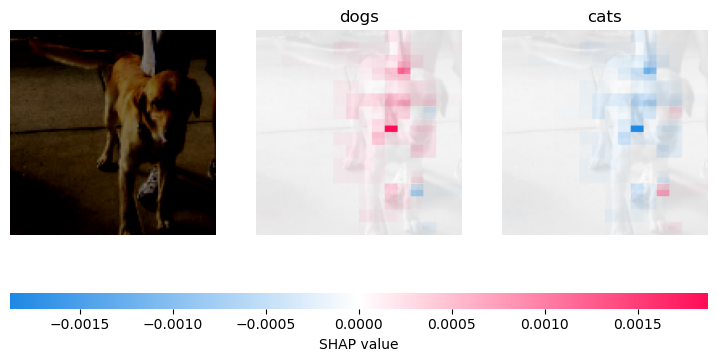

  0%|          | 0/2048 [00:00<?, ?it/s]

1/1 [==============================] - 0s 437ms/step


  1%|          | 16/2048 [00:00<01:02, 32.46it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▏         | 32/2048 [00:00<00:35, 57.06it/s]

1/1 [==============================] - 0s 81ms/step


  2%|▏         | 48/2048 [00:00<00:26, 75.37it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 64/2048 [00:00<00:22, 88.92it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▍         | 80/2048 [00:01<00:19, 98.75it/s]

1/1 [==============================] - 0s 80ms/step


  5%|▍         | 96/2048 [00:01<00:18, 106.30it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▌         | 112/2048 [00:01<00:17, 111.19it/s]

1/1 [==============================] - 0s 82ms/step


  6%|▋         | 128/2048 [00:01<00:16, 114.68it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 144/2048 [00:01<00:16, 117.58it/s]

1/1 [==============================] - 0s 81ms/step


  8%|▊         | 160/2048 [00:01<00:15, 118.11it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▊         | 176/2048 [00:01<00:15, 119.38it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▉         | 192/2048 [00:01<00:15, 120.56it/s]

1/1 [==============================] - 0s 80ms/step


 10%|█         | 208/2048 [00:02<00:15, 121.48it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█         | 224/2048 [00:02<00:14, 122.10it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 240/2048 [00:02<00:14, 122.27it/s]

1/1 [==============================] - 0s 81ms/step


 12%|█▎        | 256/2048 [00:02<00:14, 122.77it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█▎        | 272/2048 [00:02<00:14, 122.85it/s]

1/1 [==============================] - 0s 81ms/step


 14%|█▍        | 288/2048 [00:02<00:14, 122.87it/s]

1/1 [==============================] - 0s 81ms/step


 15%|█▍        | 304/2048 [00:02<00:14, 123.17it/s]

1/1 [==============================] - 0s 82ms/step


 16%|█▌        | 320/2048 [00:02<00:14, 121.43it/s]

1/1 [==============================] - 0s 81ms/step


 16%|█▋        | 336/2048 [00:03<00:14, 121.61it/s]

1/1 [==============================] - 0s 81ms/step


 17%|█▋        | 352/2048 [00:03<00:13, 122.07it/s]

1/1 [==============================] - 0s 82ms/step


 18%|█▊        | 368/2048 [00:03<00:13, 122.02it/s]

1/1 [==============================] - 0s 80ms/step


 19%|█▉        | 384/2048 [00:03<00:13, 122.67it/s]

1/1 [==============================] - 0s 80ms/step


 20%|█▉        | 400/2048 [00:03<00:13, 123.02it/s]

1/1 [==============================] - 0s 82ms/step


 20%|██        | 416/2048 [00:03<00:13, 122.93it/s]

1/1 [==============================] - 0s 81ms/step


 21%|██        | 432/2048 [00:03<00:13, 122.91it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 448/2048 [00:04<00:12, 123.13it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 464/2048 [00:04<00:13, 121.65it/s]

1/1 [==============================] - 0s 82ms/step


 23%|██▎       | 480/2048 [00:04<00:12, 121.44it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▍       | 496/2048 [00:04<00:12, 121.07it/s]

1/1 [==============================] - 0s 82ms/step


 25%|██▌       | 512/2048 [00:04<00:12, 121.30it/s]

1/1 [==============================] - 0s 82ms/step


 26%|██▌       | 528/2048 [00:04<00:12, 121.27it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 544/2048 [00:04<00:12, 121.37it/s]

1/1 [==============================] - 0s 81ms/step


 27%|██▋       | 560/2048 [00:04<00:12, 121.52it/s]

1/1 [==============================] - 0s 82ms/step


 28%|██▊       | 576/2048 [00:05<00:12, 121.58it/s]

1/1 [==============================] - 0s 80ms/step


 29%|██▉       | 592/2048 [00:05<00:11, 121.89it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 608/2048 [00:05<00:11, 121.96it/s]

1/1 [==============================] - 0s 81ms/step


 30%|███       | 624/2048 [00:05<00:11, 120.14it/s]

1/1 [==============================] - 0s 81ms/step


 31%|███▏      | 640/2048 [00:05<00:11, 120.56it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 656/2048 [00:05<00:11, 121.32it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 672/2048 [00:05<00:11, 121.46it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▎      | 688/2048 [00:05<00:11, 121.52it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▍      | 704/2048 [00:06<00:11, 121.95it/s]

1/1 [==============================] - 0s 81ms/step


 35%|███▌      | 720/2048 [00:06<00:10, 122.03it/s]

1/1 [==============================] - 0s 81ms/step


 36%|███▌      | 736/2048 [00:06<00:10, 122.40it/s]

1/1 [==============================] - 0s 81ms/step


 37%|███▋      | 752/2048 [00:06<00:10, 122.42it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 768/2048 [00:06<00:10, 121.07it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 784/2048 [00:06<00:10, 121.66it/s]

1/1 [==============================] - 0s 81ms/step


 39%|███▉      | 800/2048 [00:06<00:10, 121.76it/s]

1/1 [==============================] - 0s 81ms/step


 40%|███▉      | 816/2048 [00:07<00:10, 122.40it/s]

1/1 [==============================] - 0s 80ms/step


 41%|████      | 832/2048 [00:07<00:09, 123.02it/s]

1/1 [==============================] - 0s 81ms/step


 41%|████▏     | 848/2048 [00:07<00:09, 122.81it/s]

1/1 [==============================] - 0s 81ms/step


 42%|████▏     | 864/2048 [00:07<00:09, 122.78it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████▎     | 880/2048 [00:07<00:09, 122.91it/s]

1/1 [==============================] - 0s 81ms/step


 44%|████▍     | 896/2048 [00:07<00:09, 122.66it/s]

1/1 [==============================] - 0s 81ms/step


 45%|████▍     | 912/2048 [00:07<00:09, 121.14it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▌     | 928/2048 [00:07<00:09, 121.17it/s]

1/1 [==============================] - 0s 82ms/step


 46%|████▌     | 944/2048 [00:08<00:09, 120.71it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 960/2048 [00:08<00:09, 120.87it/s]

1/1 [==============================] - 0s 81ms/step


 48%|████▊     | 976/2048 [00:08<00:08, 121.31it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 992/2048 [00:08<00:08, 121.92it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▉     | 1008/2048 [00:08<00:08, 122.18it/s]

1/1 [==============================] - 0s 80ms/step


 50%|█████     | 1024/2048 [00:08<00:08, 122.23it/s]

1/1 [==============================] - 0s 81ms/step


 51%|█████     | 1040/2048 [00:08<00:08, 122.21it/s]

1/1 [==============================] - 0s 80ms/step


 52%|█████▏    | 1056/2048 [00:09<00:08, 122.73it/s]

1/1 [==============================] - 0s 82ms/step


 52%|█████▏    | 1072/2048 [00:09<00:08, 120.82it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 1088/2048 [00:09<00:07, 121.20it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 1104/2048 [00:09<00:07, 121.82it/s]

1/1 [==============================] - 0s 81ms/step


 55%|█████▍    | 1120/2048 [00:09<00:07, 122.06it/s]

1/1 [==============================] - 0s 81ms/step


 55%|█████▌    | 1136/2048 [00:09<00:07, 122.17it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████▋    | 1152/2048 [00:09<00:07, 122.21it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████▋    | 1168/2048 [00:09<00:07, 122.56it/s]

1/1 [==============================] - 0s 80ms/step


 58%|█████▊    | 1184/2048 [00:10<00:07, 122.68it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▊    | 1200/2048 [00:10<00:06, 122.83it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 1216/2048 [00:10<00:06, 121.36it/s]

1/1 [==============================] - 0s 81ms/step


 60%|██████    | 1232/2048 [00:10<00:06, 121.72it/s]

1/1 [==============================] - 0s 81ms/step


 61%|██████    | 1248/2048 [00:10<00:06, 122.17it/s]

1/1 [==============================] - 0s 81ms/step


 62%|██████▏   | 1264/2048 [00:10<00:06, 122.15it/s]

1/1 [==============================] - 0s 81ms/step


 62%|██████▎   | 1280/2048 [00:10<00:06, 122.60it/s]

1/1 [==============================] - 0s 81ms/step


 63%|██████▎   | 1296/2048 [00:10<00:06, 122.86it/s]

1/1 [==============================] - 0s 80ms/step


 64%|██████▍   | 1312/2048 [00:11<00:05, 123.44it/s]

1/1 [==============================] - 0s 81ms/step


 65%|██████▍   | 1328/2048 [00:11<00:05, 123.14it/s]

1/1 [==============================] - 0s 80ms/step


 66%|██████▌   | 1344/2048 [00:11<00:05, 123.50it/s]

1/1 [==============================] - 0s 81ms/step


 66%|██████▋   | 1360/2048 [00:11<00:05, 123.44it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████▋   | 1376/2048 [00:11<00:05, 121.59it/s]

1/1 [==============================] - 0s 81ms/step


 68%|██████▊   | 1392/2048 [00:11<00:05, 121.79it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████▉   | 1408/2048 [00:11<00:05, 122.18it/s]

1/1 [==============================] - 0s 81ms/step


 70%|██████▉   | 1424/2048 [00:12<00:05, 122.16it/s]

1/1 [==============================] - 0s 81ms/step


 70%|███████   | 1440/2048 [00:12<00:04, 122.49it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████   | 1456/2048 [00:12<00:04, 122.68it/s]

1/1 [==============================] - 0s 81ms/step


 72%|███████▏  | 1472/2048 [00:12<00:04, 122.80it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 1488/2048 [00:12<00:04, 122.73it/s]

1/1 [==============================] - 0s 81ms/step


 73%|███████▎  | 1504/2048 [00:12<00:04, 123.04it/s]

1/1 [==============================] - 0s 80ms/step


 74%|███████▍  | 1520/2048 [00:12<00:04, 122.08it/s]

1/1 [==============================] - 0s 80ms/step


 75%|███████▌  | 1536/2048 [00:12<00:04, 122.40it/s]

1/1 [==============================] - 0s 80ms/step


 76%|███████▌  | 1552/2048 [00:13<00:04, 122.89it/s]

1/1 [==============================] - 0s 80ms/step


 77%|███████▋  | 1568/2048 [00:13<00:03, 123.49it/s]

1/1 [==============================] - 0s 80ms/step


 77%|███████▋  | 1584/2048 [00:13<00:03, 123.81it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 1600/2048 [00:13<00:03, 123.36it/s]

1/1 [==============================] - 0s 81ms/step


 79%|███████▉  | 1616/2048 [00:13<00:03, 123.07it/s]

1/1 [==============================] - 0s 81ms/step


 80%|███████▉  | 1632/2048 [00:13<00:03, 122.88it/s]

1/1 [==============================] - 0s 80ms/step


 80%|████████  | 1648/2048 [00:13<00:03, 123.39it/s]

1/1 [==============================] - 0s 81ms/step


 81%|████████▏ | 1664/2048 [00:13<00:03, 121.66it/s]

1/1 [==============================] - 0s 81ms/step


 82%|████████▏ | 1680/2048 [00:14<00:03, 121.54it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████▎ | 1696/2048 [00:14<00:02, 122.28it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▎ | 1712/2048 [00:14<00:02, 122.88it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▍ | 1728/2048 [00:14<00:02, 123.02it/s]

1/1 [==============================] - 0s 81ms/step


 85%|████████▌ | 1744/2048 [00:14<00:02, 123.05it/s]

1/1 [==============================] - 0s 80ms/step


 86%|████████▌ | 1760/2048 [00:14<00:02, 123.09it/s]

1/1 [==============================] - 0s 80ms/step


 87%|████████▋ | 1776/2048 [00:14<00:02, 123.24it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 1792/2048 [00:15<00:02, 123.37it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 1808/2048 [00:15<00:01, 123.24it/s]

1/1 [==============================] - 0s 81ms/step


 89%|████████▉ | 1824/2048 [00:15<00:01, 121.18it/s]

1/1 [==============================] - 0s 82ms/step


 90%|████████▉ | 1840/2048 [00:15<00:01, 121.60it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 1856/2048 [00:15<00:01, 121.73it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████▏| 1872/2048 [00:15<00:01, 122.16it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 1888/2048 [00:15<00:01, 122.80it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 1904/2048 [00:15<00:01, 123.04it/s]

1/1 [==============================] - 0s 81ms/step


 94%|█████████▍| 1920/2048 [00:16<00:01, 122.82it/s]

1/1 [==============================] - 0s 81ms/step


 95%|█████████▍| 1936/2048 [00:16<00:00, 123.03it/s]

1/1 [==============================] - 0s 81ms/step


 95%|█████████▌| 1952/2048 [00:16<00:00, 122.77it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████▌| 1968/2048 [00:16<00:00, 121.36it/s]

1/1 [==============================] - 0s 81ms/step


 97%|█████████▋| 1984/2048 [00:16<00:00, 121.45it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 2000/2048 [00:16<00:00, 121.52it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 2016/2048 [00:16<00:00, 121.82it/s]

1/1 [==============================] - 0s 80ms/step


 99%|█████████▉| 2032/2048 [00:16<00:00, 122.68it/s]

1/1 [==============================] - 0s 81ms/step


100%|██████████| 2048/2048 [00:17<00:00, 119.72it/s]


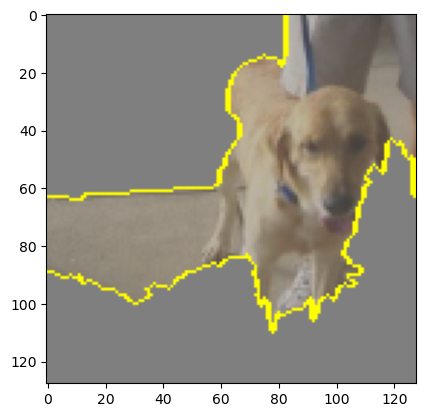

In [7]:
from support.evaluations.image_classification import explain_image_classifier_with_occlusion, explain_image_classifier_with_saliency, special_explain_image_classifier_with_shap, special_explain_image_classifier_with_lime
# 3. SHAP
special_explain_image_classifier_with_shap(model, first_k[0][0], class_names)
# 4. LIME
special_explain_image_classifier_with_lime(model, first_k[0][0][0], len(class_names))

In [ ]:
# for the same image we need to evaluate the LAX model output also

In [6]:


import tensorflow_datasets as tfds
import tensorflow as tf
with open('../random/020879', 'rb') as fp:
    results = pickle.load(fp)

test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

results.summary()

results.model_data.get_model().evaluate(test_dset)

1 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
We have 1 GPUs



FileNotFoundError: [Errno 2] No such file or directory: '../random/020879'

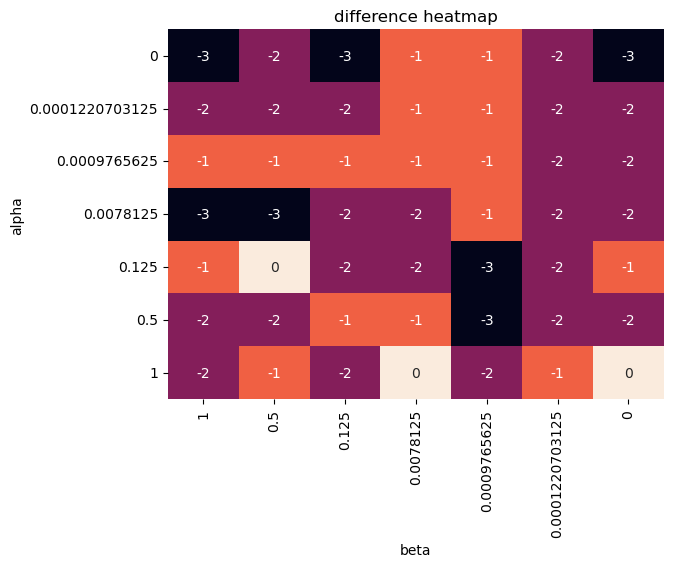

[(0, 0, 3.0), (0, 0.125, 3.0), (0, 1, 3.0), (0.0078125, 0.5, 3.0), (0.0078125, 1, 3.0), (0.125, 0.0009765625, 3.0), (0.5, 0.0009765625, 3.0), (0, 0.0001220703125, 2.0), (0, 0.5, 2.0), (0.0001220703125, 0, 2.0), (0.0001220703125, 0.0001220703125, 2.0), (0.0001220703125, 0.125, 2.0), (0.0001220703125, 0.5, 2.0), (0.0001220703125, 1, 2.0), (0.0009765625, 0, 2.0), (0.0009765625, 0.0001220703125, 2.0), (0.0078125, 0, 2.0), (0.0078125, 0.0001220703125, 2.0), (0.0078125, 0.0078125, 2.0), (0.0078125, 0.125, 2.0), (0.125, 0.0001220703125, 2.0), (0.125, 0.0078125, 2.0), (0.125, 0.125, 2.0), (0.5, 0, 2.0), (0.5, 0.0001220703125, 2.0), (0.5, 0.5, 2.0), (0.5, 1, 2.0), (1, 0.0009765625, 2.0), (1, 0.125, 2.0), (1, 1, 2.0), (0, 0.0009765625, 1.0), (0, 0.0078125, 1.0), (0.0001220703125, 0.0009765625, 1.0), (0.0001220703125, 0.0078125, 1.0), (0.0009765625, 0.0009765625, 1.0), (0.0009765625, 0.0078125, 1.0), (0.0009765625, 0.125, 1.0), (0.0009765625, 0.5, 1.0), (0.0009765625, 1, 1.0), (0.0078125, 0.00097

In [4]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'

count = np.zeros(tuple(shape))

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    
    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    count[tuple(result_coord)] += 1

threes = np.ones_like(count) * 3
remaining = np.minimum(count - threes, np.zeros_like(count))

sn.heatmap(np.flip(remaining, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()

indicies_unfinished = [i for i in zip(*[j for j in remaining.nonzero()])]

alpha_beta_reps = [(values['alpha'][i], values['beta'][j], -1*remaining[i, j]) for i, j in indicies_unfinished]

print(sorted(alpha_beta_reps, key=lambda k: k[-1], reverse=True))
print(len(alpha_beta_reps))


#### with open('../random/' + np.flip(fnames_grid, 1).flatten()[np.argmax(np.flip((grid - grid2), 1))], 'rb') as fp:
#    results = pickle.load(fp)
# '../fullrezdot/288538'
with open('../fullrezdot/600885', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

show_mask(test_dset, 32, model_data, class_names=class_names)

In [5]:
with open('../random/569259', 'rb') as fp:
    results = pickle.load(fp)

results.summary()


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function circles_squares at 0x2b6ca71e5e10>
	dset_args: {
		image_size: (64, 64)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 64
	prefetch: 8
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2b6ca5df9c60>
	network_args: {
		hyperband: False
		beta: 0.0009765625
		image_size: (64, 64, 3)
		alpha: 0.0009765625
		l2: None
		conv_size: [3]
		dense_layers: [32, 16]
		noise_level: 0.005
		learning_rate: 0.0005
		n_classes: 2
		l1: None
		lrate: 0.001
		iterations: 3
		conv_filters: 32
		depth: 4
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: False
	}

Experiment 

In [1]:
# next, find the predictions that are correct and incorrect
#from support.evaluations.image_classification import explain_image_classifier_with_saliency
import pickle
import tensorflow as tf

# '../fullrezdot/288538'
# '../random/685321'
# '../random/568735'
# '../results/806269' - highest accuracy (dot)
# '../results/411728' - highest difference (dot)
# '../random/020879' - highest difference (cd)
with open('../cats_dogs_grid/971787', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data

test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(1)




2023-02-12 09:51:50.085087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



------------------------------------------------------------
Experimental Results Summary (Index: 47)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2baa043693f0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 97
	prefetch: 8
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_focal_LAXNet at 0x2baa04369000>
	network_args: {
		hyperband: False
		conv_size: [3]
		learning_rate: 0.0005
		n_classes: 2
		l1: None
		gamma: 0
		noise_level: 0.005
		alpha: 0
		conv_filters: 24
		dense_layers: [16]
		l2: None
		depth: 5
		image_size: (128, 128, 3)
		beta: 0.0001220703125
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	patience: 32
	min_delta: 0.0
	epochs: 512
	nogo: False
	}

Experiment Runtime: 18737.037889957428s

Epochs Run / Average Time: 83 / 

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)


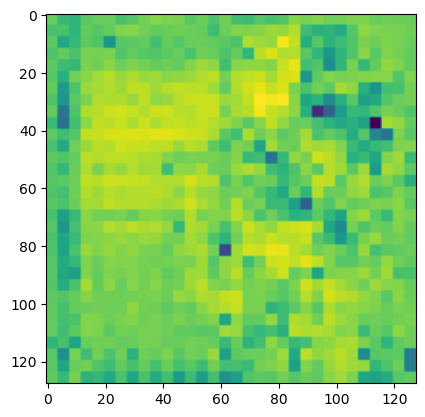

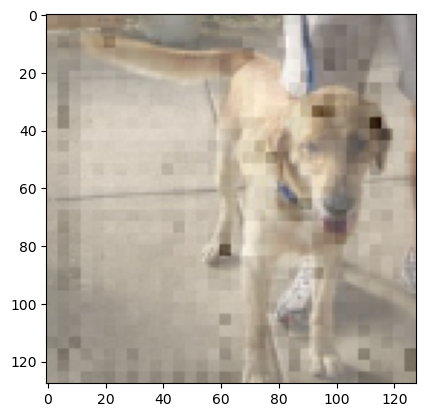

(None, 128, 128, 3)


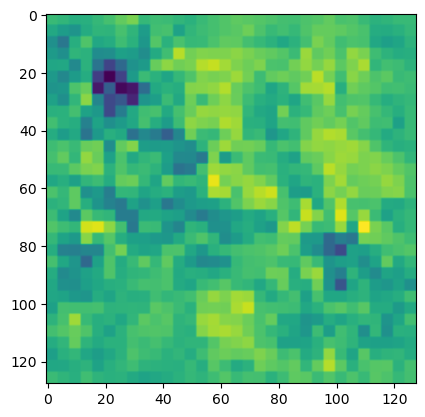

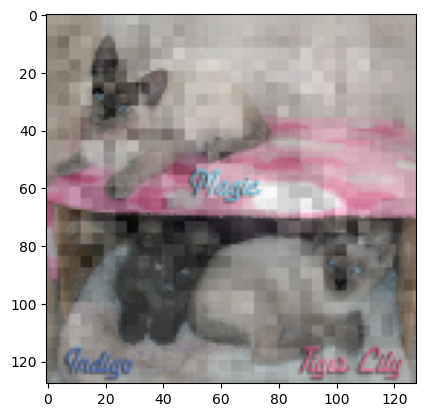

(None, 128, 128, 3)


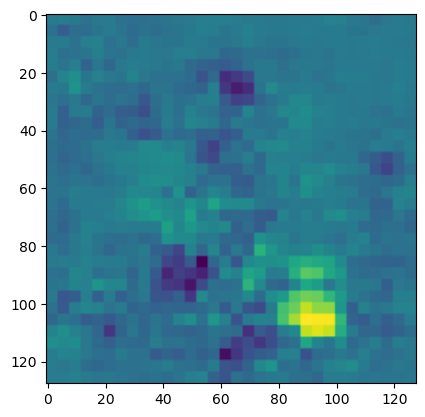

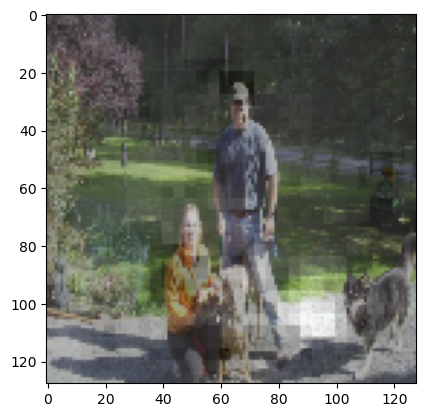

(None, 128, 128, 3)


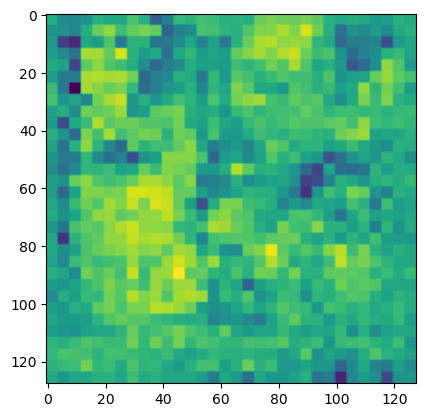

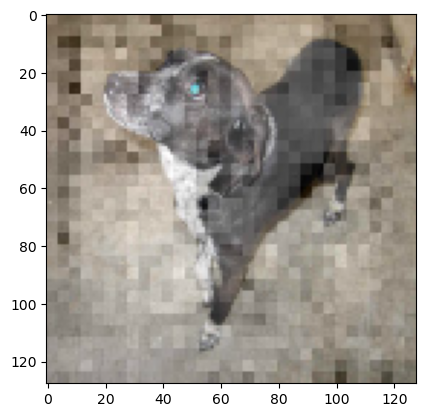

(None, 128, 128, 3)


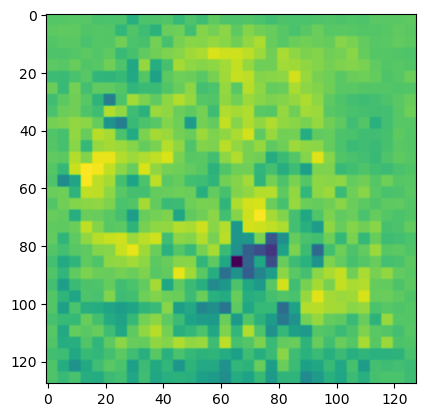

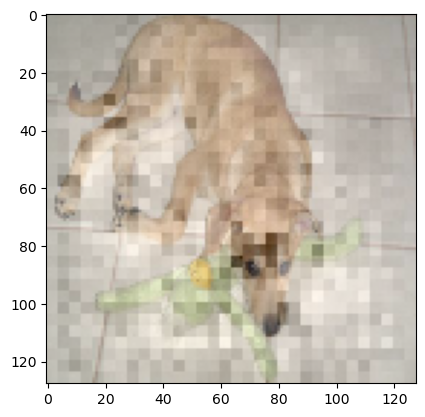

(None, 128, 128, 3)


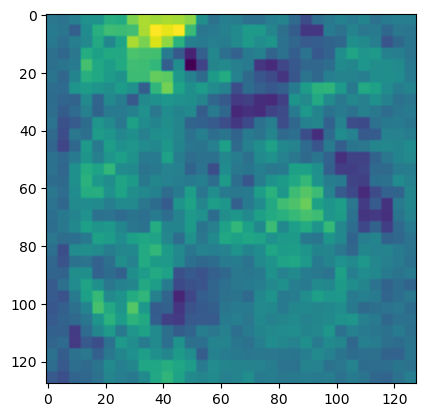

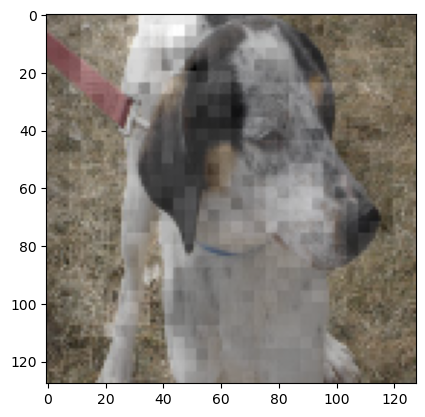

(None, 128, 128, 3)


KeyboardInterrupt: 

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize_image(image):
    # image = 

    image -= tf.reduce_min(image)
    image /= tf.reduce_max(image)

    return image


def explain_image_classifier_with_occlusion(model, instance, patch_size=8):
    # code adapted from https://gist.github.com/RaphaelMeudec/7985b0c5eb720a29021d52b0a0be549a
    # Create function to apply a grey patch on an image
    def apply_grey_patch(image, top_left_x, top_left_y, patch_size):
        patched_image = np.array(image, copy=True)
        patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = tf.reduce_mean(image)

        return patched_image
    
    img = instance[0]

    sensitivity_map = np.zeros((img.shape[0], img.shape[1]), dtype=float)

    # Iterate the patch over the image
    for top_left_x in range(0, img.shape[0], patch_size // 2):
        for top_left_y in range(0, img.shape[1], patch_size // 2):
            patched_image = apply_grey_patch(img, top_left_x, top_left_y, patch_size)
            predicted_classes = model.predict(np.array([patched_image]), verbose=0)['crossentropy'][0]
            confidence = predicted_classes[tf.argmax(predicted_classes)]

            # Save confidence for this specific patched image in map
            sensitivity_map[
                top_left_y:top_left_y + patch_size,
                top_left_x:top_left_x + patch_size,
            ] = confidence
            
    plt.imshow(min_max_normalize_image(sensitivity_map), 'viridis')
    plt.show()
    plt.imshow(min_max_normalize_image(tf.cast(tf.expand_dims(min_max_normalize_image(sensitivity_map), -1), tf.float32) + tf.cast(img, tf.float32)))
    plt.show()

for x, y in test_dset:
    explain_image_classifier_with_occlusion(model_data.get_model(), x, 8)

In [1]:
# next, find the predictions that are correct and incorrect
from supervised.evaluations.image_classification import masking_evaluation
# '../fullrezdot/288538'
# '../random/685321'
# '../random/568735'
# '../results/806269' - highest accuracy (dot)
# '../results/411728' - highest difference (dot)
# '../random/020879' - highest difference (cd)
with open('../results/806269', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data

test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

for x, y in test_dset:
    explain_image_classifier_with_saliency(model_data.get_model(), instance)

masking_evaluation(model_data, test_dset, class_names, 0)

ModuleNotFoundError: No module named 'supervised'

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)
60/60 [==============================] - 14s 141ms/step
(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


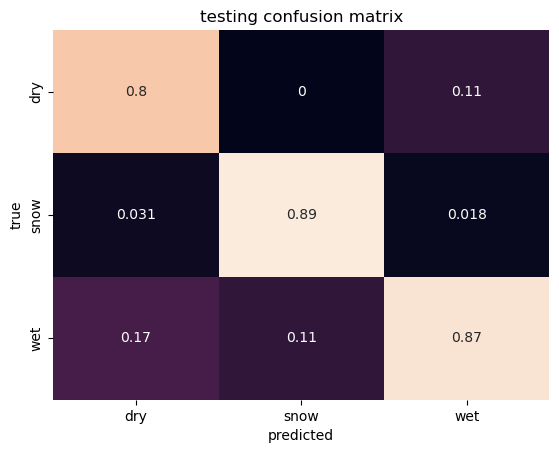

(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


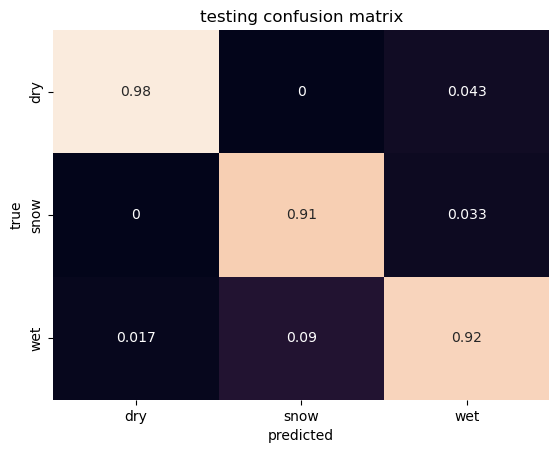

(None, 128, 128, 4)
60/60 [==============================] - 20s 132ms/step - loss: 0.2081 - clam_loss: 0.2010 - tf.math.multiply_144_loss: 8.1441 - clam_1_loss: 0.9087 - clam_categorical_accuracy: 0.9458 - clam_1_categorical_accuracy: 0.8415


[0.20811337232589722,
 0.2010137289762497,
 8.144105911254883,
 0.9087463617324829,
 0.9457609057426453,
 0.8414955139160156]

In [36]:
# '../fullrezdot/288538'
# '../random/685321'
# '../random/568735'
# '../results/806269' - highest accuracy (dot)
# '../results/411728' - highest difference (dot)
# '../random/020879' - highest difference (cd)
# '../random/568735' - highest accuracy (cd)
results = None
with open('../results/806269', 'rb') as fp:
    results = pickle.load(fp)
    
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

print(y_pred['crossentropy'].shape, y_true.shape)

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

results.model_data.get_model().evaluate(test_dset)

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)
60/60 [==============================] - 14s 141ms/step
(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


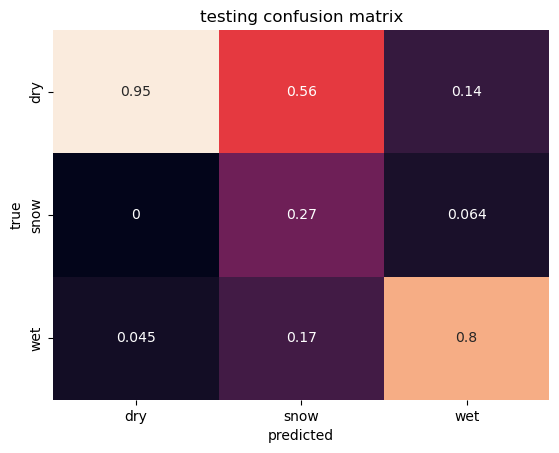

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


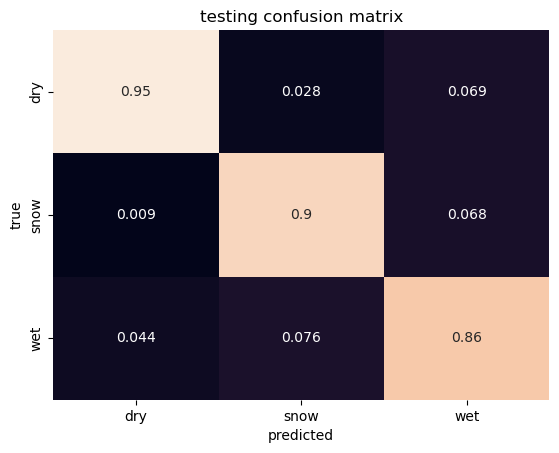

(None, 128, 128, 4)
60/60 [==============================] - 19s 133ms/step - loss: 0.8641 - clam_loss: 0.2975 - tf.math.multiply_154_loss: 3.1120 - clam_1_loss: 0.5423 - clam_categorical_accuracy: 0.9057 - clam_1_categorical_accuracy: 0.4576


[0.8641089200973511,
 0.29752615094184875,
 3.1120433807373047,
 0.5422700047492981,
 0.9057398438453674,
 0.45760926604270935]

In [37]:
results = None
with open('../results/411728', 'rb') as fp:
    results = pickle.load(fp)
    
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

results.model_data.get_model().evaluate(test_dset)

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)
24/24 [==============================] - 26s 813ms/step
(4652, 2) (4652, 2)


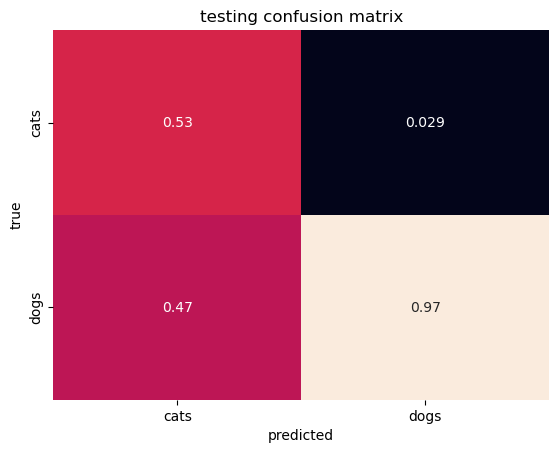

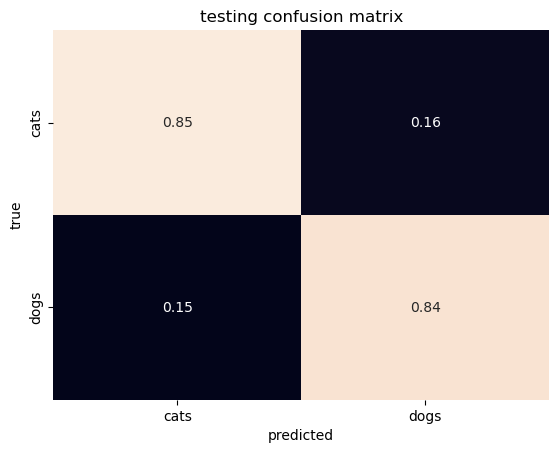

In [40]:
results = None
with open('../random/020879', 'rb') as fp:
    results = pickle.load(fp)
    
obj = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
test_dset, class_names = obj['test'], obj['class_names']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

In [ ]:
results = None
with open('../random/568735', 'rb') as fp:
    results = pickle.load(fp)

obj = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
test_dset, class_names = obj['test'], obj['class_names']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import os

from lime import lime_image
import shap

from skimage.io import imread
from skimage.segmentation import mark_boundaries

import tensorflow as tf

import os, contextlib

def supress_stdout(func):
    def wrapper(*a, **ka):
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stdout(devnull):
                return func(*a, **ka)
    return wrapper


def supress_stderr(func):
    def wrapper(*a, **ka):
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stderr(devnull):
                return func(*a, **ka)
    return wrapper


def invert_permutation(p, axis=-1):
    """
    Reverse a permutation p (such as the output of argsort along axis) which is along axis of the permutation array.
    """
    p = np.asanyarray(p) # in case p is a tuple, etc.
    s = np.empty_like(p)
    
    inds = np.arange(p.shape[axis])
    
    for i, a in enumerate(p.shape):
        if axis == -1:
            if i != len(p.shape) - 1:
                inds = np.expand_dims(inds, 0)
        elif a < axis:
            inds = np.expand_dims(inds, 0)
        elif a > axis:
            inds = np.expand_dims(inds, -1)
    
    inds = np.broadcast_to(inds, p.shape)
    np.put_along_axis(s, p, inds, axis=axis)

    return s


def get_rf(model, instance, patch_size=11, step=3, randrange=(-1, 1), layer=-4):
    new_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[layer].output[0])
    
    # Create function to apply a random patch on an image tiled across the whole image to get the receptive field of a  
    bottom, top = randrange
    def apply_random_patch(image, top_left_x, top_left_y, patch_size):
        patched_image = np.array(image, copy=True)
        patched_image[:, top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = tf.random.uniform((1, patch_size, patch_size, image.shape[-1]), maxval=top, minval=bottom)

        return patched_image
    
    img = instance
    
    sensitivity_map = np.zeros((img.shape[0], img.shape[1], img.shape[2], new_model.output.shape[-1]), dtype=float)
    original_features = new_model(instance)

    # Iterate the patch over the image
    for top_left_x in range(0, img.shape[1] - patch_size, step):
        for top_left_y in range(0, img.shape[2] - patch_size, step):
            patched_image = apply_random_patch(img, top_left_x, top_left_y, patch_size)
            predicted_classes = new_model.predict(patched_image, verbose=0)
            # Save difference for this specific patched image in map
            sensitivity_map[:,
                top_left_y:top_left_y + patch_size,
                top_left_x:top_left_x + patch_size,
            ] = tf.expand_dims(tf.expand_dims(tf.reduce_sum(tf.abs(tf.subtract(original_features, predicted_classes)), axis=(1, 2)), 1), 1)  # L1 difference
            
    return tf.reduce_sum(sensitivity_map, -1)


@supress_stdout
@supress_stderr
def explain_image_classifier_with_lime(model, instance, n_classes, key='crossentropy'):
    """
    show a visual explanation using LIME for an image classification keras Model and a image instance with matplotlib
    """
    instance = np.array(instance)
    explainer = lime_image.LimeImageExplainer(kernel_width=.125)
    
    if key:
        def special_predict(instance):
            return model.predict(instance)[key]
    else:
        def special_predict(instance):
            return model.predict(instance)
        
    lime_explanations = np.stack([explainer.explain_instance(instance.astype(np.double)[i], special_predict, top_labels=n_classes,
                                             hide_color=0, num_samples=1024, batch_size=64) for i in range(instance.shape[0])], 0)
    
    explanations = [explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True) for explanation in lime_explanations]
    
    return np.concatenate([tf.expand_dims(mark_boundaries(temp / 2 + .5, mask), 0) for temp, mask in explanations], 0)


@supress_stderr
@supress_stdout
def explain_image_classifier_with_shap(model, instance, class_names, key='crossentropy'):
    instance = np.array(instance).astype(np.double)
    print(instance.shape)
    # define a masker that is used to mask out partitions of the input image, this one uses a blurred background
    masker = shap.maskers.Image("blur(256,256)", instance[0].shape)
    
    if key:
        def special_predict(instance):
            return model.predict(instance)[key]
    else:
        def special_predict(instance):
            rax = model.predict(instance)
            return rax
    
    # By default the Partition explainer is used for all  partition explainer
    explainer = shap.Explainer(special_predict, masker, output_names=class_names)
    # show the values contributing and detracting from each class prediction in order of their prediction probability
    shap_values = np.stack([explainer(np.expand_dims(instance[i], 0), max_evals=1024, batch_size=64,
                            outputs=shap.Explanation.argsort.flip).values for i in range(instance.shape[0])], 0)
    shap_values = np.squeeze(shap_values)
    
    inverted = np.expand_dims(np.expand_dims(np.expand_dims(invert_permutation(np.argsort(special_predict(instance))), 1), 1), 1)
    print(shap_values.shape, inverted.shape)
    sv = np.take_along_axis(shap_values, inverted, -1)
    print(sv.shape)
    return tf.reduce_sum(np.transpose(sv, axes=(0, 4, 1, 2, 3)), axis=-1)


def min_max_normalize_image(image):
    # image = 

    image -= tf.reduce_min(image)
    image /= tf.reduce_max(image)

    return image


@supress_stdout
def explain_image_classifier_with_saliency(model, instance, key='crossentropy'):
    # instance = np.array(instance).astype(np.double)
    # instance = np.expand_dims(instance, 0)
    instance = tf.convert_to_tensor(instance)
    instance = tf.cast(instance, tf.double)
    
    if key:
        result = model.predict(instance)
        max_idx = tf.argmax(result[key], -1)

        with tf.GradientTape() as tape:
            tape.watch(instance)
            result = model(instance)

            max_score = tf.reduce_max(result[key], -1)# np.take_along_axis(result[key].numpy(), np.expand_dims(max_idx.numpy(), axis=-1), -1)

        grads = tape.gradient(max_score, instance)
    else:
        result = model.predict(instance)
        max_idx = tf.argmax(result, -1)

        with tf.GradientTape() as tape:
            tape.watch(instance)
            result = model(instance)
            max_score = max_score = tf.reduce_max(result, -1)# np.take_along_axis(result.numpy(), np.expand_dims(max_idx.numpy(), axis=-1), -1)

        grads = tape.gradient(max_score, instance)

    pos = tf.nn.relu(grads)
    neg = tf.nn.relu(tf.zeros_like(grads) - grads)

    pos = min_max_normalize_image(tf.reduce_max(pos, -1))
    neg = min_max_normalize_image(tf.reduce_max(neg, -1))

    return pos, neg


def explain_image_classifier_with_occlusion(model, instance, classes, patch_size=11, step=32, key='crossentropy'):
    # Create function to apply a random patch on an image tiled across the whole image to get the receptive field of a  
    def apply_grey_patch(image, top_left_x, top_left_y, patch_size):
        patched_image = np.array(image, copy=True)
        patched_image[:, top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = tf.reduce_mean(image, axis=(1, 2), keepdims=True)
        return patched_image
    
    img = instance
    
    if key:
        def special_predict(instance):
            return model.predict(instance, verbose=0)[key]
    else:
        def special_predict(instance):
            return model.predict(instance, verbose=0)
    
    sensitivity_map = np.zeros((img.shape[0], img.shape[1], img.shape[2], len(classes)), dtype=float)
    original_features = special_predict(instance)

    # Iterate the patch over the image
    for top_left_x in range(0, img.shape[1] - patch_size, step):
        for top_left_y in range(0, img.shape[2] - patch_size, step):
            patched_image = apply_grey_patch(img, top_left_x, top_left_y, patch_size)
            predicted_classes = special_predict(patched_image)
            # Save difference for this specific patched image in map
            sensitivity_map[:, 
                top_left_y:top_left_y + patch_size,
                top_left_x:top_left_x + patch_size,
            ] += tf.expand_dims(tf.expand_dims(tf.subtract(predicted_classes, original_features), 1), 1)  # L1 difference
            
    return sensitivity_map


def batch_color_squish(x):
    """
    squishes a tensor of (rows, columns, channels) to a tensor of (rows, columns, RGB (3)) using the color alphabet
    channels must be less than or equal to 26.
    """
    # a couple candidate colors
    colors = [(240, 163, 255), (0, 117, 220), (153, 63, 0), (76, 0, 92), (25, 25, 25), (0, 92, 49),
              (43, 206, 72), (255, 204, 153), (128, 128, 128), (148, 255, 181), (143, 124, 0), (157, 204, 0),
              (194, 0, 136), (0, 51, 128), (255, 164, 5), (255, 168, 187), (66, 102, 0), (255, 0, 16),
              (94, 241, 242), (0, 153, 143), (224, 255, 102), (116, 10, 255), (153, 0, 0), (255, 255, 128),
              (255, 255, 0), (255, 80, 5)][:x.shape[-1]]
    colors = np.array(colors, np.float32)
    x = tf.cast(x, tf.float32)

    return np.array(tf.einsum('hijk,kl->hijl', x, colors)).astype(np.uint8), colors


def LAX_output(model, batch, class_names):
    """
    Return the LAX output for the model on a batch
    """
    
    new_model = None
    
    for i, layer in enumerate(model.layers[::-1]):
        print(layer.name)
        if 'clam' in layer.name:
            new_model = layer
            break
    else:
        raise AttributeError('CAM output not found in model')
        
    model = new_model
    
    base_out, idk, cam = model.predict(batch)
    
    im = tf.nn.relu(cam[:, :, :, :-1] - (tf.expand_dims(cam[:, :, :, -1], -1) / len(class_names)))
    
    im, colors = batch_color_squish(im)
    
    return im

In [3]:
@supress_stdout
@supress_stderr
def prepare_data(results, k=10):
    results.config.dataset_params['dset_args']['path'] = '../data/'

    dset_dict = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
    class_names = dset_dict['class_names']

    model_data = results.model_data

    test_dset = dset_dict['test']

    test_dset = test_dset.batch(min(results.config.dataset_params['batch'], 16))
    
    numpy_test_dataset = tfds.as_numpy(test_dset)
    first_k = []

    for x, y in numpy_test_dataset:
        first_k.append((x, y))
        k -= 1
        if not k:
            break
    
    return first_k, dset_dict

In [26]:
from time import time
from support.util import dict_to_string
from IPython import display
import matplotlib.pyplot as plt


def nn_agnostic_explanations(model, class_names, batch, key='crossentropy', times=dict(), maps=dict(), index=0):
    # this one is for everything
    start = time()
    maps['Saliency'] = explain_image_classifier_with_saliency(model, batch[0], key=key)
    times['Saliency'] = time() - start 
    
    start = time()
    maps['SHAP'] = explain_image_classifier_with_shap(model, batch[0], class_names, key=key)
    times['SHAP'] = time() - start

    start = time()
    # TODO complete this for the whole batch
    maps['LIME'] = explain_image_classifier_with_lime(model, batch[0], len(class_names), key=key)
    times['LIME'] = time() - start

    start = time()
    maps['Occlusion'] = explain_image_classifier_with_occlusion(model, batch[0], class_names, step=3, key=key)
    times['Occlusion'] = time() - start
    
    return maps, times


def ICNN_rf(model, batch, times=dict(), maps=dict()):
    # this is for the ICNN
    start = time()
    maps['ICNN RF'] = get_rf(model, batch, step=3)
    times['ICNN RF'] = time() - start

    return maps, times


def CNN_rf(model, batch, times=dict(), maps=dict()):
    # This is for the regular CNN
    start = time()
    maps['CNN RF'] = tf.reduce_sum(get_rf(model, batch, step=3, layer=-4), -1)
    times['CNN RF'] = time() - start

    return maps, times


def LAX_cam(model, batch, times=dict(), maps=dict()):
    # for the LAX model
    start = time()
    maps['LAX'] = LAX_output(model, batch, class_names)
    times['LAX'] = time() - start

    return maps, times


def comparison_pipeline(model, first_k, class_names, model_type='LAX', batch=0, index=0, save_dir=None):
    """
    pipeline for the explainability comparison between models.
    
    :param model: keras model object with a .predict function
    :param class_names: list of class names in order
    :param first_k: list of the first k batches in the dataset as numpy arrays
    :param model_type: one of 'LAX', 'ICNN', or 'CNN' the type of model input
    :param batch: batch number to display from or -1 for all batches
    TODO:
    :param index: integer less than the size of the batch or -1, the example to display for the comparison.  -1 is the entire batch.
    :param save_dir: directory path to save the images to or None if not to save
    """
    batches = [batch] if batch > -1 else [b for b in range(len(first_k))]
    indicies = [index] if index > -1 else [i for i in range(first_k[0][0].shape[0])]
    maps, times = dict(), dict()
    for b in batches:
        if model_type == 'LAX':
            maps, times = LAX_cam(model, first_k[b][0], times, maps)
        elif model_type == 'ICNN':
            maps, times = ICNN_rf(model, first_k[b][0], times, maps)
        elif model_type == 'CNN':
            # maps, times = CNN_rf(model, first_k[b][0], times, maps)
            pass
        else:
            raise ValueError('unrecognized model_type: ' + model_type)
            
        # all of this computation will be batched except the LIME which cannot be
        if model_type == 'CNN':
            maps, times = nn_agnostic_explanations(model, class_names, first_k[b], key=None, times=times, maps=maps, index=index)
        else:
            pass
            maps, times = nn_agnostic_explanations(model, class_names, first_k[b], key='crossentropy', times=times, maps=maps, index=index)

        key_order = sorted(list(maps.keys()))
        times = {i:times[i] / len(indicies) for i in times}

        for ind in indicies:
            f, axarr = plt.subplots(1, len(key_order) + len(class_names) + 3)
            f.set_figwidth(50)
            f.set_figheight(10)
            # clear tick labels
            for ax in axarr:
                ax.set_xticks([])
                ax.set_yticks([])

            axarr[0].imshow(min_max_normalize_image(first_k[b][0][ind]))
            axarr[0].set_xlabel('Input')
            offset = 1
            for i in range(len(key_order)):
                # problem is that for shap and saliency there are multiple values to show
                if key_order[i] == 'Saliency':
                    axarr[i + offset].imshow(maps[key_order[i]][0][ind])
                    axarr[i + offset].set_xlabel(key_order[i] +' +')
                    offset += 1
                    axarr[i + offset].imshow(maps[key_order[i]][1][ind])
                    axarr[i + offset].set_xlabel(key_order[i] +' -' + f'\n{times[key_order[i]]}')
                elif key_order[i] == 'SHAP':
                    for j in range(maps[key_order[i]].shape[1]):
                        # TODO put a legend here for the shap values' magnitude
                        axarr[i + offset].imshow(min_max_normalize_image(maps[key_order[i]][ind][j]))
                        axarr[i + offset].set_xlabel(key_order[i] + f' {class_names[j]}')
                        offset += 1
                    else:
                        offset -= 1
                        axarr[i + offset].set_xlabel(key_order[i] + f' {class_names[-1]}\n{times[key_order[i]]}')
                elif key_order[i] == 'Occlusion':
                    # TODO fix indexing here to return the whole batch
                    for j in range(maps[key_order[i]].shape[-1]):
                        axarr[i + offset].imshow(min_max_normalize_image(maps[key_order[i]][ind, :, :, j]))
                        axarr[i + offset].set_xlabel(key_order[i] + f' {class_names[j]}')
                        offset += 1
                    else:
                        offset -= 1
                        axarr[i + offset].set_xlabel(key_order[i] + f' {class_names[-1]}\n{times[key_order[i]]}')
                else:
                    axarr[i + offset].imshow(maps[key_order[i]][ind])
                    axarr[i + offset].set_xlabel(key_order[i] + f'\n{times[key_order[i]]}')

            plt.savefig(f'{save_dir}/{"".join(class_names)}-{b}-{ind}.jpg')
            plt.close()
    

In [ ]:
import gc
from support.util import load_most_recent_results_with_fnames as load_most_recent_results
import tensorflow_datasets as tfds
import pickle

with open('../ICNN/970466', 'rb') as fp:
    results = pickle.load(fp)
    
first_k, dset_dict = prepare_data(results)

class_names = dset_dict['class_names']

model_data = results.model_data

model = model_data.get_model()

gc.collect()
comparison_pipeline(model, first_k, class_names, model_type='ICNN', batch=-1, index=-1, save_dir='../pics/ICNN')

In [27]:
import gc
from support.util import load_most_recent_results_with_fnames as load_most_recent_results
import tensorflow_datasets as tfds
import pickle

with open('../cats_dogs_grid/971787', 'rb') as fp:
    results = pickle.load(fp)

first_k, dset_dict = prepare_data(results)

class_names = dset_dict['class_names']

model_data = results.model_data

model = model_data.get_model()
    
gc.collect()
comparison_pipeline(model, first_k, class_names, model_type='LAX', batch=-1, index=-1, save_dir='../pics/LAX')

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9
Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0x

(None, 128, 128, 3)
tf.math.reduce_sum_7
tf.math.multiply_19
tf.__operators__.getitem_139
tf.linalg.normalize_11
tf.linalg.normalize_10
tf.math.reduce_mean_11
plurality_masker
all_masker
clam
1/1 [==============================] - 1s 1s/step
tf.math.reduce_sum_7
tf.math.multiply_19
tf.__operators__.getitem_139
tf.linalg.normalize_11
tf.linalg.normalize_10
tf.math.reduce_mean_11
plurality_masker
all_masker
clam
1/1 [==============================] - 0s 45ms/step
tf.math.reduce_sum_7
tf.math.multiply_19
tf.__operators__.getitem_139
tf.linalg.normalize_11
tf.linalg.normalize_10
tf.math.reduce_mean_11
plurality_masker
all_masker
clam
1/1 [==============================] - 0s 45ms/step
tf.math.reduce_sum_7
tf.math.multiply_19
tf.__operators__.getitem_139
tf.linalg.normalize_11
tf.linalg.normalize_10
tf.math.reduce_mean_11
plurality_masker
all_masker
clam
1/1 [==============================] - 0s 41ms/step
tf.math.reduce_sum_7
tf.math.multiply_19
tf.__operators__.getitem_139
tf.linalg.normal

In [15]:
results.model_data.get_model().summary()

(None, 128, 128, 3)
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 2),          254391      ['input_3[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 128, 128, 3               'all_masker[0][0]']             
                                )]                                                                
                                                                    

In [ ]:
len(first_k)

In [9]:
np.squeeze(shap_values).shape

NameError: name 'shap_values' is not defined

In [64]:
from IPython import display
import matplotlib.pyplot as plt

for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])

axarr[0].plot(lime)
axarr[0].set_xlabel('LIME')
axarr[1].imshow(pos)
axarr[2].imshow(neg)
axarr[3].imshow(occ[:, :, 1], cmap='viridis')
# axarr[4].imshow(min_max_normalize_image(tf.reduce_sum(rf, axis=-1)))
axarr[5].imshow(min_max_normalize_image(tf.reduce_sum(np.transpose(np.squeeze(shap_values), axes=(3, 4, 0, 1, 2)), axis=-1)[0][0]))
axarr[6].imshow(LAX)
axarr[7].imshow(min_max_normalize_image(first_k[0][0][0]))

ValueError: x and y can be no greater than 2D, but have shapes (128,) and (128, 128, 3)

In [85]:
print(shap_values.shape)

(1, 256, 256, 3, 1, 2)


In [ ]:
# shap value arrays are sorted by class probability ranking
tf.reduce_sum(shap_values.values, axis=(0, 1, 2, 3))

In [16]:
import os, contextlib, warnings

def suppress_stdout(func):
    def wrapper(*a, **ka):
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stdout(devnull):
                return func(*a, **ka)
    return wrapper

def suppress_stderr(func):
    def wrapper(*a, **ka):
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stderr(devnull):
                return func(*a, **ka)
    return wrapper

@suppress_stdout
def print_nothing():
    print('something')

@suppress_stderr
def error_nothing():
    warnings.warn('something', DeprecationWarning)
    
print_nothing()
error_nothing()

print('this is all you can see!')

this is all you can see!


In [212]:
def invert_permutation(p, axis=-1):
    """
    Reverse a permutation p which is along axis of the permutation array.
    """
    p = np.asanyarray(p) # in case p is a tuple, etc.
    s = np.empty_like(p)
    
    inds = np.arange(p.shape[axis])
    
    for i, a in enumerate(p.shape):
        if axis == -1:
            if i != len(p.shape) - 1:
                inds = np.expand_dims(inds, 0)
        elif a < axis:
            inds = np.expand_dims(inds, 0)
        elif a > axis:
            inds = np.expand_dims(inds, -1)
    
    inds = np.broadcast_to(inds, p.shape)
    np.put_along_axis(s, p, inds, axis=axis)

    return s

In [218]:
random = np.random.uniform(0, 1, (10, 10))
perm = np.argsort(random, axis=-1)
perm.shape

(10, 10)

In [219]:
r = invert_permutation(perm)
r.shape

(10, 10)

In [220]:
print(np.array_equal(perm, r))
print(perm)
print(r)

False
[[9 2 1 6 5 0 4 3 8 7]
 [9 0 1 5 4 2 3 6 7 8]
 [9 4 6 1 5 2 7 3 0 8]
 [1 6 0 2 9 5 4 3 7 8]
 [0 2 3 5 8 6 7 9 4 1]
 [4 5 1 0 8 6 3 9 2 7]
 [6 8 9 2 7 0 1 3 4 5]
 [8 0 3 1 5 4 2 7 6 9]
 [4 1 6 2 8 5 3 7 9 0]
 [3 2 9 4 8 0 7 1 5 6]]
[[5 2 1 7 6 4 3 9 8 0]
 [1 2 5 6 4 3 7 8 9 0]
 [8 3 5 7 1 4 2 6 9 0]
 [2 0 3 7 6 5 1 8 9 4]
 [0 9 1 2 8 3 5 6 4 7]
 [3 2 8 6 0 1 5 9 4 7]
 [5 6 3 7 8 9 0 4 1 2]
 [1 3 6 2 5 4 8 7 0 9]
 [9 1 3 6 0 5 2 7 4 8]
 [5 7 1 0 3 8 9 6 4 2]]


In [221]:
print(np.array_equal(np.take_along_axis(random, perm, axis=-1), np.take_along_axis(random, perm, axis=1)))
sort = np.take_along_axis(random, perm, axis=-1)
sort

True


array([[0.00567907, 0.09521498, 0.11913467, 0.24969597, 0.47412717,
        0.77345919, 0.83658644, 0.89749379, 0.91634345, 0.97385432],
       [0.08685449, 0.18642674, 0.22216868, 0.34538854, 0.50305014,
        0.6818971 , 0.89245151, 0.89812313, 0.91178675, 0.95761794],
       [0.01481765, 0.02487665, 0.05602265, 0.14663533, 0.17769345,
        0.22859585, 0.33404898, 0.59370488, 0.6702696 , 0.78915296],
       [0.03199837, 0.24957367, 0.30712761, 0.35444875, 0.42374603,
        0.47047073, 0.62594375, 0.70124552, 0.70608422, 0.9061148 ],
       [0.03094334, 0.04599582, 0.14535603, 0.31722151, 0.39398216,
        0.60066588, 0.78638857, 0.84010042, 0.92971603, 0.97792804],
       [0.29620661, 0.39832492, 0.4825485 , 0.49042375, 0.62122292,
        0.80593789, 0.8102218 , 0.81770611, 0.87390459, 0.98238085],
       [0.39061181, 0.46165637, 0.54503997, 0.6508005 , 0.72929415,
        0.89649574, 0.91940098, 0.94612453, 0.98981489, 0.9954716 ],
       [0.03530406, 0.19236456, 0.2697690

In [222]:
print(np.array_equal(sort, random))
print(np.array_equal(np.take_along_axis(sort, r, axis=1), random))

False
True


In [202]:
random

array([[0.38537487, 0.10335765],
       [0.47370497, 0.86611027],
       [0.77164781, 0.33236939],
       [0.46385771, 0.83031934],
       [0.82515643, 0.19601182],
       [0.24944708, 0.75722057],
       [0.95985613, 0.35820837],
       [0.46840698, 0.2870216 ],
       [0.90863918, 0.52009107],
       [0.70671944, 0.88583652]])

In [129]:
np.take_along_axis(sort, r, axis=-1)

array([[0.15379151, 0.7784531 ],
       [0.06990312, 0.98961507],
       [0.98961507, 0.06990312],
       [0.15379151, 0.7784531 ],
       [0.15379151, 0.7784531 ],
       [0.15379151, 0.7784531 ],
       [0.15379151, 0.7784531 ],
       [0.98961507, 0.06990312],
       [0.98961507, 0.06990312],
       [0.15379151, 0.7784531 ]])

In [15]:
import pickle
import os

def get_label_arrays():
    for root, dirs, files in os.walk("../labels/"):
        # this list will hold the lists of (label, lab_path, unlab_path)
        label_arrays = []
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'rb') as fp:
                label_arrays.append(pickle.load(fp))

        return label_arrays


def extract_labels(label_array):
    class_map = {'dry': 1, 'snow': 2, 'wet': 3}
    label_tuples = []
    disagreeing_paths = []
    exceptions = 0
    for entry in label_array:
        try:
            label_tuples.append((int(entry[0]), class_map[entry[1][0].split('/')[-2]]))
            if label_tuples[-1][0] != 0:
                if label_tuples[-1][0] != label_tuples[-1][1]:
                    with open(f'../data/skyline_6464/{os.path.basename(entry[1][1])}', 'rb') as fp:
                        print('exists')
                    disagreeing_paths.append((entry[1][0], entry[1][1], label_tuples[-1][0], label_tuples[-1][1]))
        except ValueError as v:
            exceptions += 1
            
    print(disagreeing_paths)
    return label_tuples, exceptions

extracteds = [extract_labels(label_array) for label_array in get_label_arrays()]

def compute_disagreement(extracted):
    print(f'exceptions: {extracted[-1]}')
    agree, disagree = 0, 0
    for entry in extracted[0]:
        if entry[0] == entry[1] or entry[0] == 0:
            agree += 1
        else:
            disagree += 1
    print(agree / (agree + disagree), (agree))
    
for extracted in extracteds:
    compute_disagreement(extracted)

exists
exists
exists
exists
exists
exists


FileNotFoundError: [Errno 2] No such file or directory: '../data/skyline_6464/I_87_at_Interchange_3_(Yonkers_Mile_Square_Road)__Northbound__Skyline_6464_2022-03-10-01:00:19.jpg'

In [14]:
with open('../data/skyline_6464/I_87_at_Interchange_3_(Yonkers_Mile_Square_Road)__Northbound__Skyline_6464_2022-01-30-15:00:12.jpg', 'rb') as fp:
    print('exists')

exists
